## BUSA8031 Business Analytics Project – Assignment 3

#### Analyze the trends in COVID-19 cases, deaths, and recoveries over time for Australia, New Zealand and Canada:
The reasons to choose these three countries: they have similar charateristic including geographical location, economy, and demographics as well as healthcare and education. 

| Syntax                    | New Zealand | Canada        |
| :---                      |    :----    |          :--- |
|                           |             |               |
| Geographical Location     | Geographically close to Australia, sharing a similar climate and culture      | Although not in the same region, Canada shares similarities in terms of vast landmass, multiculturalism, and strong natural resource sectors      |
| Economy                   |A developed economy with a strong agricultural sector and tourism industry, similar to Australia    |Rich in natural resources, Canada's economy has similarities to Australia's reliance on mining and commodities              |
| Demographics              |A culturally diverse society with a mix of indigenous and immigrant populations    |A multicultural and diverse population, like Australia   |
| Healthcare and Education  |Has a well-developed healthcare system and education sector |Offers a high standard of healthcare and education, similar to Australia  |



#### Approach: 
##### Data collection: 
- We use the most widely used sources is the "Our World in Data" (OWID) COVID-19 dataset, which provides global COVID-19 statistics as the dataset includes information on daily onew Covid-19 cases and hospitablised patients in these three countries.

##### 1. Time Series Analysis: 
- Convert the date column into a time series format, making it easier to analyze trends over time.
- Create line plots or time series plots to visualize the daily or weekly trends in new Covid-19 cases and hospitablised patients over time.

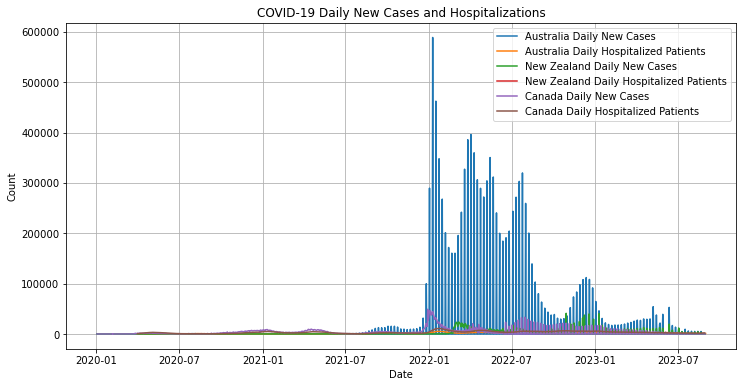

In [3]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the OWID COVID-19 dataset
data = pd.read_csv('owid-covid-data.csv')

# Filter data for Australia, New Zealand, and Canada
countries = ['Australia', 'New Zealand', 'Canada']
filtered_data = data[data['location'].isin(countries)].copy()

# Convert the 'date' column to datetime
filtered_data['date'] = pd.to_datetime(filtered_data['date'], errors='coerce')

# Set the 'date' column as the index
filtered_data.set_index('date', inplace=True)

# Plot COVID-19 daily new cases and hospitalizations for the selected countries
plt.figure(figsize=(12, 6))
for country in countries:
    country_data = filtered_data[filtered_data['location'] == country]
    plt.plot(country_data.index, country_data['new_cases'], label=f'{country} Daily New Cases')
    plt.plot(country_data.index, country_data['hosp_patients'], label=f'{country} Daily Hospitalized Patients')

plt.title('COVID-19 Daily New Cases and Hospitalizations')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()

Data is not at vailable for 2020 and 2021 but available only for 2022 and up to 30 August 2023.

##### 2. Analyze how the factors of number of people vaccinated, population density, age 65 older, hospital beds per thousand, and stringency index influence the spread of the virus.

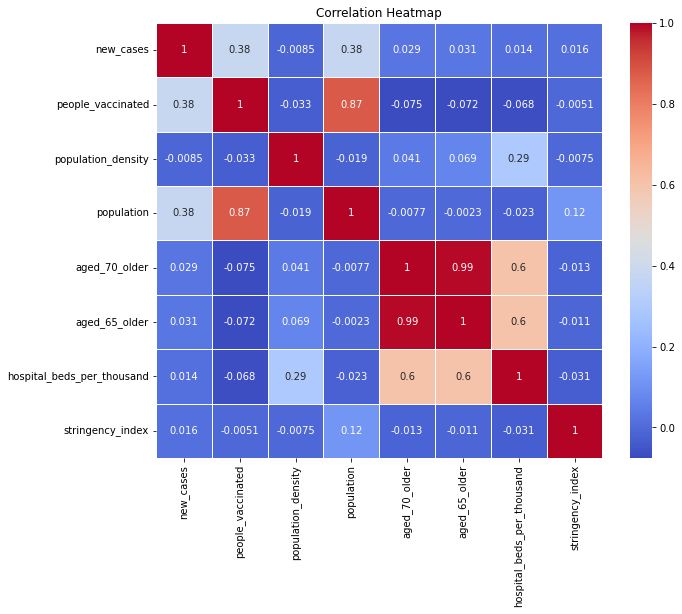

In [11]:
import pandas as pd

# Load the OWID COVID-19 dataset
data = pd.read_csv('owid-covid-data.csv')

# Convert date column to datetime
data['date'] = pd.to_datetime(data['date'], errors='coerce')

# Handle missing values if necessary
data.dropna(subset=['date'], inplace=True)

# Calculate correlations
correlation_matrix = data[['new_cases', 'people_vaccinated','population_density','population','aged_70_older','aged_65_older', 'hospital_beds_per_thousand', 'stringency_index']].corr()

import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap to visualize correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

The heatmap provides a clear visual representation of the correlations as below:
- Factors have strong correlations to covid-19 outcome: population of the country, number of people got vaccinated
- Factors also have medium correlations to covid-19 outcomes: aging of population, number of hospitals per thousand people and stringency index.
- Factors do not have a strong correlations to covid-19 outcomes: population indensity
